## Binary detection

### Install packages
Windows computer + python 3.10

```pip install scikit-learn scikit-learn-intelex xgboost```

### Use sklearnex to speed up scikit-learn
**works only on Intel x86 computer**

In [2]:
from sklearnex import patch_sklearn
patch_sklearn()
# remember to put the above lines before any importing sklearn package codes

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


### Load the dataset for traffic

In [4]:
import pandas as pd

df = pd.read_csv('datasets/preprocess_label_traffic.csv')
X = df.drop('Label', axis='columns')
X = X.values
y = df['Label'].values
y = y.reshape(-1)

### Define the models

In [78]:
# linear models
from sklearn.linear_model import LogisticRegression, SGDClassifier, PassiveAggressiveClassifier
# non-linear models
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
# ensemble models
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
import pickle

core = 4 # your computer's maximum core numbers, for improving the training speed

models = {}
# linear models
models['Logistic_Regression'] = LogisticRegression(max_iter=1500, n_jobs=core)
models['SGD'] = SGDClassifier(n_jobs=core)
models['Passive_Aggressive'] = PassiveAggressiveClassifier(n_jobs=core)
# non-linear models
models['Decision_Tree'] = DecisionTreeClassifier()
models['Extra_Tree'] = ExtraTreeClassifier()
models['Gaussian_NB'] = GaussianNB()
models['SVC'] = SVC(kernel='rbf', gamma='auto')
models['KNeighbors'] = KNeighborsClassifier(n_jobs=core)
# ensemble models
models['XGB'] = XGBClassifier(n_jobs=core)
models['Random_Forest'] = RandomForestClassifier(n_jobs=core)
models['Ada_Boost'] = AdaBoostClassifier()
models['Bagging'] = BaggingClassifier(n_jobs=core)
models['Extra_Trees'] = ExtraTreesClassifier(n_jobs=core)
models['Gradient_Boosting'] = GradientBoostingClassifier()

### Training, testing, and evaluation

In [79]:
import os
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

# training and testing
evaluation = {}
for name in models:
    evaluation[name] = {
        'accuracy': [],
        'precision': [],
        'recall': [],
        'f1_score': []
    }
for i in range(5):
    # split the dataset into training set and testing set
    # specify a number for random_state if you want to make the splitting result all the same
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i*100+29)
    for name, model in models.items():
        model_filename = os.path.join('models', name + '_' + str(i+1))
        if os.path.exists(model_filename): # load the model from disk
            model = pickle.load(open(model_filename, 'rb'))
        else:
            print('Training model {} for the {} time...'.format(name, i+1))
            model.fit(X_train, y_train) # save the model to disk
            pickle.dump(model, open(model_filename, 'wb'))
        y_hat = model.predict(X_test)
        # evaluation
        evaluation[name]['accuracy'].append(accuracy_score(y_test, y_hat))
        evaluation[name]['precision'].append(precision_score(y_test, y_hat))
        evaluation[name]['recall'].append(recall_score(y_test, y_hat))
        evaluation[name]['f1_score'].append(f1_score(y_test, y_hat))

### Show the model evalution result

Calculate average values

In [91]:
from statistics import mean
import numpy as np
import matplotlib.pyplot as plt
import math

def round_off(value, n): # 無條件捨去到小數點後第 n 位
    return math.floor(value * (10 ** n)) / float(10 ** n) 

models = [name.replace('_', '\n') for name in evaluation]
result = {
    'accuracy': [],
    'precision': [],
    'recall': [],
    'f1_score': []
}
for name in evaluation:
    for key, value in evaluation[name].items():
        result[key].append(round_off(mean(value), 3))

Show the figure

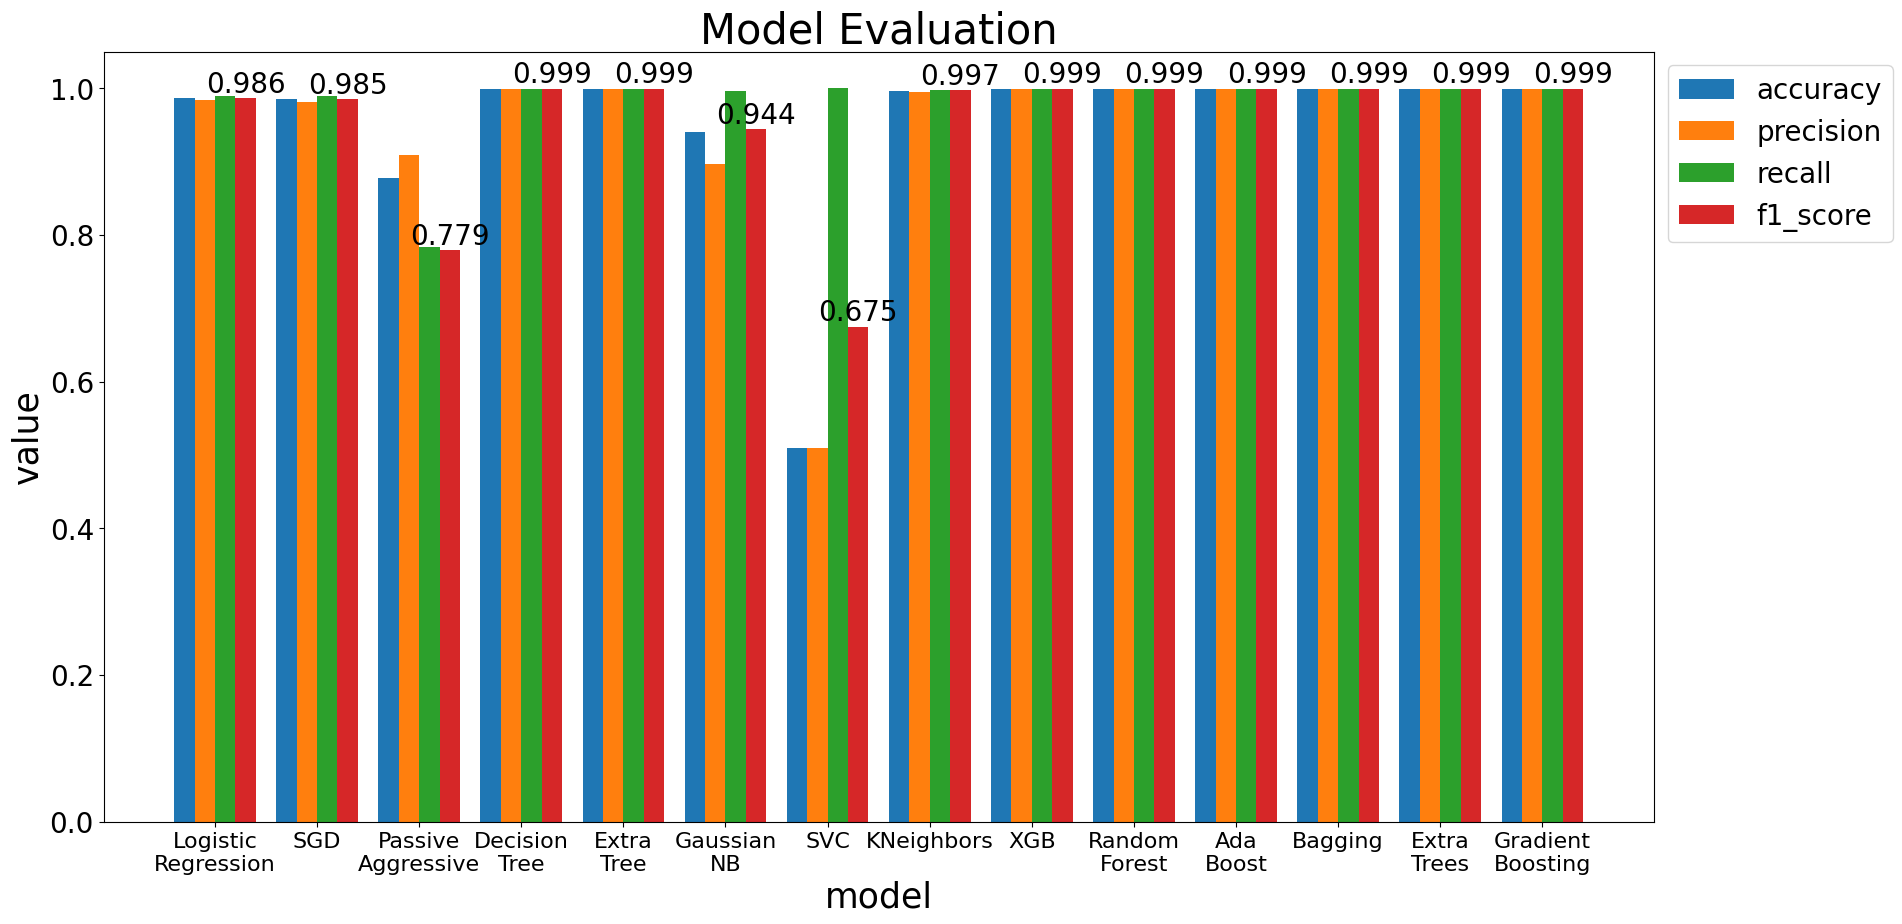

In [89]:
width = 0.2
x = np.arange(len(models))
plt.figure(figsize=(20, 10))
plt.bar(x, result['accuracy'], width, label='accuracy')
plt.bar(x+width, result['precision'], width, label='precision')
plt.bar(x+2*width, result['recall'], width, label='recall')
bar = plt.bar(x+3*width, result['f1_score'], width, label='f1_score')
plt.bar_label(bar, label_type='edge', fontsize=20)
plt.title('Model Evaluation', fontsize=30)
plt.xticks(x+1.5*width, models)
plt.xlabel('model', fontsize=25)
plt.ylabel('value', fontsize=25)
plt.rcParams.update({
    'xtick.labelsize': 16,
    'ytick.labelsize': 20,
})
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize=20)
plt.show()

Simplified version

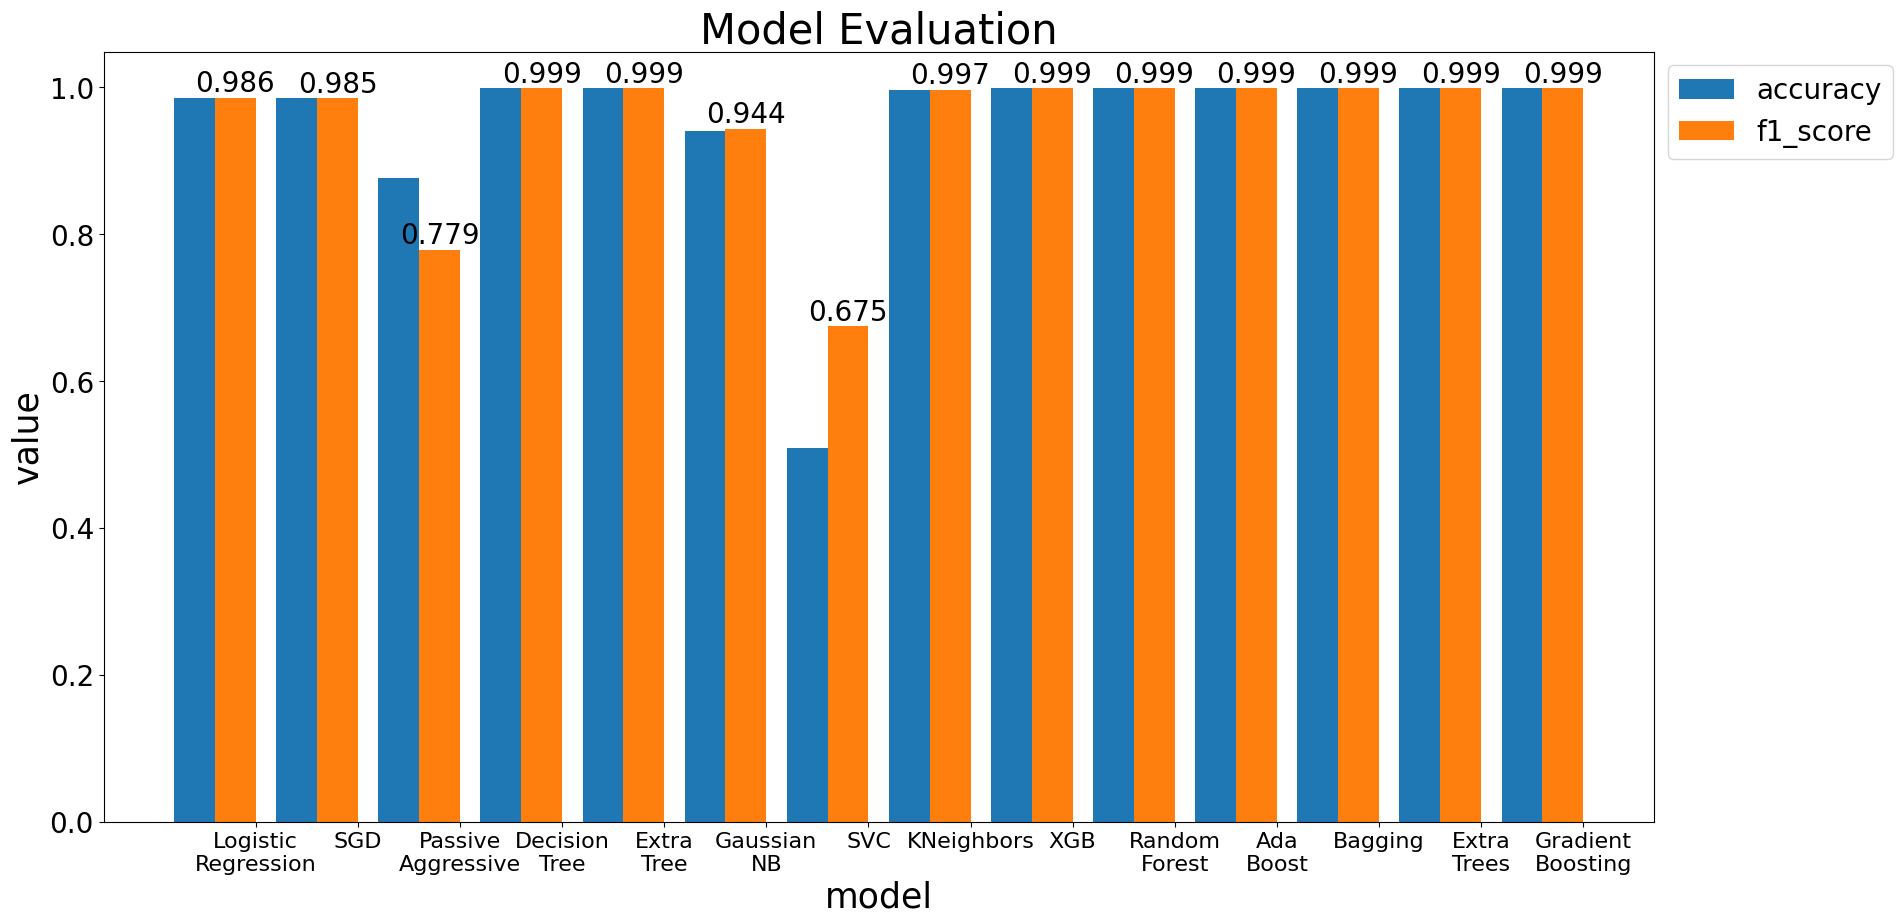

In [90]:
width = 0.4
x = np.arange(len(models))
plt.figure(figsize=(20, 10))
plt.bar(x, result['accuracy'], width, label='accuracy')
bar = plt.bar(x+width, result['f1_score'], width, label='f1_score')
plt.bar_label(bar, label_type='edge', fontsize=20)
plt.xticks(x+width, models)
plt.title('Model Evaluation', fontsize=30)
plt.xticks(x+1.5*width, models)
plt.xlabel('model', fontsize=25)
plt.ylabel('value', fontsize=25)
plt.rcParams.update({
    'xtick.labelsize': 16,
    'ytick.labelsize': 20,
})
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize=20)
plt.show()